# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [23]:
!nvcc -o tp_cuda_part_1_1_pi part1/tp_cuda_part_1_1_pi.cu -O3
!nvcc -o tp_cuda_part_1_3_pi part1/tp_cuda_part_1_3_pi.cu -O3
!nvcc -o tp_cuda_part_1_4_pi part1/tp_cuda_part_1_4_pi.cu -O3

### Performance evaluation

In [24]:
import os
import subprocess
import pandas as pd

try:
    os.remove("stats_part1.csv")
except OSError:
    pass

df = pd.DataFrame(columns=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'])
df.to_csv("stats_part1.csv", index=False)

num_steps = [100, 10000, 100000]
# num_steps = [10000, 1000000, 10000000, 100000000]
nb_threads_per_block = [1, 32, 64, 128, 256]
nb_steps_per_threads = [1, 64, 256, 1024]
repeats = range(0,10)

for nsteps in num_steps:
    for nthread_per_block in nb_threads_per_block:
        for nstep_per_thread in nb_steps_per_threads:
            for repeat in repeats:
                args = ("./tp_cuda_part_1_1_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_cuda_part_1_3_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_cuda_part_1_4_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()



### Performance analysis

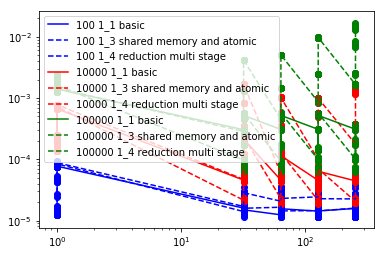

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                     'version': str,
                     'nthread_per_block': int,
                     'nstep_per_thread': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

color_num_steps = {100 : "blue", 10000 : "red", 100000 : "green", 1000000000000 : "black"}
for num_steps in df['num_steps'].drop_duplicates():
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['version'] == "1_1 basic"]
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps],label=f"{num_steps} 1_1 basic")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)

    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "1_3 shared memory and atomic")]    
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()    
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps],label=f"{num_steps} 1_3 shared memory and atomic")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)
    
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "1_4 reduction multi stage")]
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps],label=f"{num_steps} 1_4 reduction multi stage")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)

    
plt.xlabel('nb_thread_per_block')
plt.ylabel('runtime')
plt.legend(loc='lower right', bbox_to_anchor=(-0.2, 0))
plt.show()


/tmp/ipykernel_1747/3642313933.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/3642313933.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


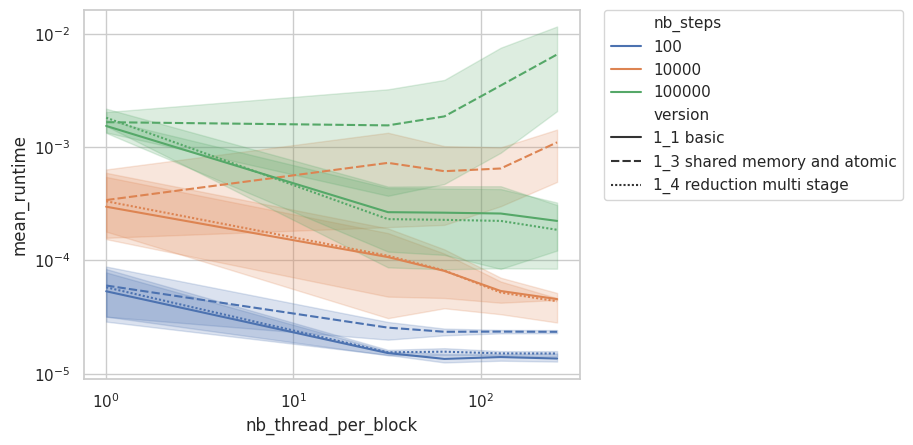

In [11]:
#Do the same as above, but with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="nb_thread_per_block", y="mean_runtime", hue="nb_steps", style="version", data=df_plot)
ax.set_xscale('log')
ax.set_yscale('log')
#make the legend smaller,  more readable outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()



/tmp/ipykernel_1747/2114409693.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/2114409693.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


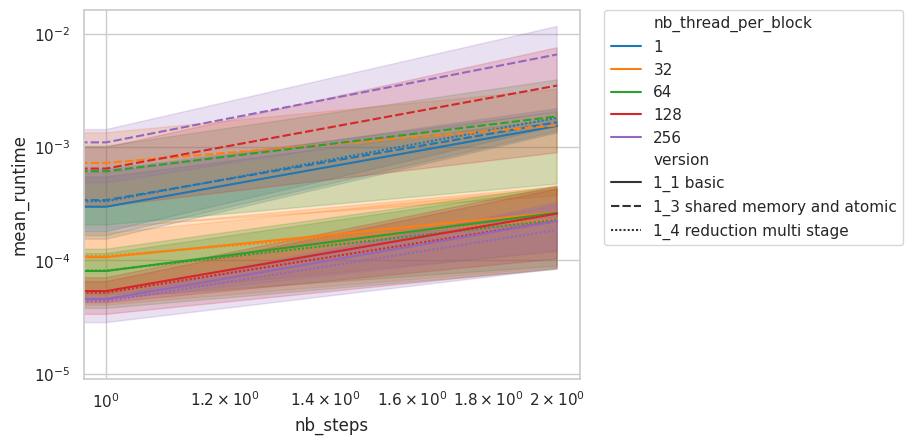

In [25]:
# Do the same as above, but with abscissa as the number of steps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")


ax = sns.lineplot(x="nb_steps", y="mean_runtime", hue="nb_thread_per_block", style="version", data=df_plot, palette="tab10")

ax.set_xscale('log')
ax.set_yscale('log')
#make the legend smaller,  more readable outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


/tmp/ipykernel_1747/3852772881.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/3852772881.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


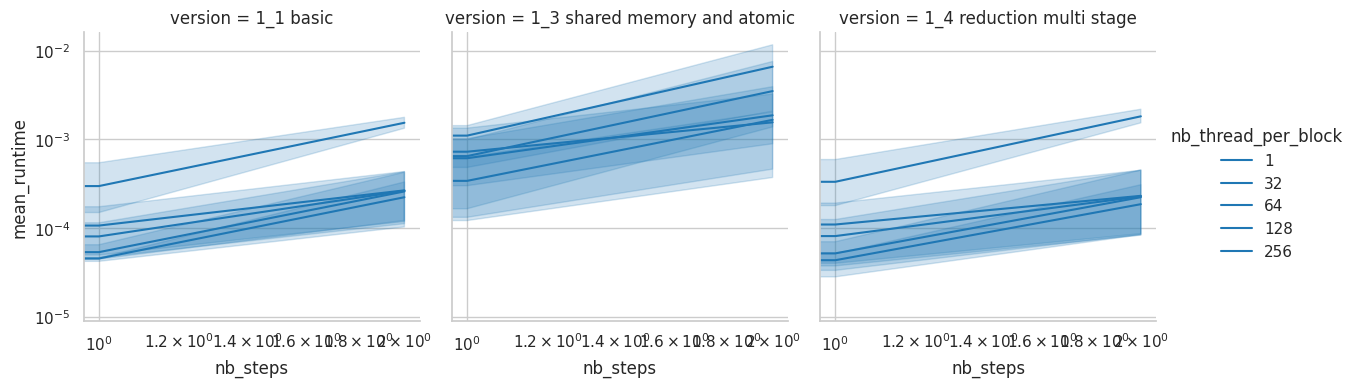

In [33]:
#plot the same as above, but each version in a different plot

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)


df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df_plot, col="version", hue="nb_thread_per_block", col_wrap=3, height=4, sharex=False, sharey=True, palette="tab10")
#Change the color by the number of thread per block
g.map_dataframe(sns.lineplot, x="nb_steps", y="mean_runtime", hue="nb_thread_per_block", style="version", data=df_plot)
g.set(xscale="log", yscale="log")
g.add_legend()
plt.show()



### Discussion